In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [17]:
dataset = pd.read_csv("Big Mart Train Data.csv")
test = pd.read_csv("Big Mart Test.csv")

# Moving categorical variables to the same section of the dataset so they can be operated on separately from numerical data.
categorical = dataset.pop("Item_Identifier")
dataset.insert(10,"Item_Identifier", categorical)
categorical = dataset.pop("Item_Fat_Content")
dataset.insert(10,"Item_Fat_Content", categorical)
categorical = dataset.pop("Item_Type")
dataset.insert(10,"Item_Type", categorical)
categorical = dataset.pop("Outlet_Identifier")
dataset.insert(10,"Outlet_Identifier", categorical)

# Repeat for the test dataset
categorical = test.pop("Item_Identifier")
test.insert(10,"Item_Identifier", categorical)
categorical = test.pop("Item_Fat_Content")
test.insert(10,"Item_Fat_Content", categorical)
categorical = test.pop("Item_Type")
test.insert(10,"Item_Type", categorical)
categorical = test.pop("Outlet_Identifier")
test.insert(10,"Outlet_Identifier", categorical)

# Splitting numerical data from categorical data for both the test and training set.
X = dataset.iloc[:,:-1]
X_num = X.iloc[:,:4]
X_cat = X.iloc[:,4:]

X_test = test.iloc[:,:]
X_num_test = X_test.iloc[:,:4]
X_cat_test = X_test.iloc[:,4:]

Y = dataset.iloc[:,-1]

# Understanding our missing data using Seaborn and MatplotLib

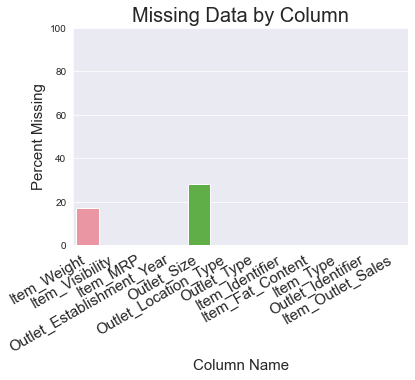

In [18]:
missing_percentages = dataset.isnull().sum()*100/len(dataset)

sb.set_style("darkgrid")
sb.barplot(x=missing_percentages.keys(), y=missing_percentages)
plt.title('Missing Data by Column',size=20)
plt.xlabel('Column Name',size=15)
plt.ylabel('Percent Missing',size=15)
plt.ylim(0,100)
plt.xticks(rotation=30,size=15, ha="right")

plt.show()

print()

This shows that we're missing data for a numerical varaible (Item_weight) and a categorical variable (Outlet_size). For those two variables ~18% and ~30% of the rows respectively are missing data. This is too large of a percentage to be comfortable just removing those rows from the dataset.

# Imputing missing data

In [19]:
from sklearn.impute import SimpleImputer
NumericalImputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_num = pd.DataFrame(NumericalImputer.fit_transform(X_num), columns=X_num.columns)
X_num_test = pd.DataFrame(NumericalImputer.transform(X_num_test), columns=X_num_test.columns)

CategoricalImputer = SimpleImputer(missing_values=np.nan, strategy="constant",fill_value="Missing Value")

X_cat = pd.DataFrame(CategoricalImputer.fit_transform(X_cat), columns=X_cat.columns)
X_cat_test = pd.DataFrame(CategoricalImputer.transform(X_cat_test), columns=X_cat_test.columns)

Here we imputed our missing numerical data using the mean of its column. Our categorical missing data is then imputed by creating a new category: "Missing Value" for each of the columns.

# One Hot and Ordinal Encoding Categorical Data

In [20]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
item_ident = X_cat.iloc[:,3]
item_ident_test = X_cat_test.iloc[:,3]
X_cat.iloc[:,3] = encoder.fit_transform(np.asarray(item_ident).reshape(len(item_ident),1))
X_cat_test.iloc[:,3] = encoder.fit_transform(np.asarray(item_ident_test).reshape(len(item_ident_test),1))

encoder2 = OrdinalEncoder()
outlet_ident = X_cat.iloc[:,-1]
outlet_ident_test = X_cat_test.iloc[:,-1]
X_cat.iloc[:,-1] = encoder2.fit_transform(np.asarray(outlet_ident).reshape(len(outlet_ident),1))
X_cat_test.iloc[:,-1] = encoder2.fit_transform(np.asarray(outlet_ident_test).reshape(len(outlet_ident_test),1))


X_cat = pd.get_dummies(X_cat)
X_cat_test = pd.get_dummies(X_cat_test)
print(X_cat.shape)
print(X_cat_test.shape)
print(X_num.shape)

X = pd.concat([X_cat,X_num], axis=1)
X_test = pd.concat([X_cat_test,X_num_test], axis=1)
print(X_test.shape)
print(X.shape)

(8523, 34)
(5681, 34)
(8523, 4)
(5681, 38)
(8523, 38)


# Running the Regressor on the Dataset

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=15, random_state=0)
#regressor = DecisionTreeRegressor(random_state=0, max_depth=25)
regressor.fit(X,Y)

y_pred = regressor.predict(X_test)

# Outputting the Results to CSV

In [22]:
item = np.asarray(X_test["Item_Identifier"]).reshape(len(X_test["Item_Identifier"]),1)
outlet = np.asarray(X_test["Outlet_Identifier"]).reshape(len(X_test["Outlet_Identifier"]),1)

final_out = pd.concat([pd.DataFrame(encoder.inverse_transform(item),columns=["Item_Identifier"]), pd.DataFrame(encoder2.inverse_transform(outlet),columns=["Outlet_Identifier"]), pd.DataFrame(y_pred, columns=["Item_Outlet_Sales"])], axis=1)
final_out = final_out.to_csv("solution.csv",index=False)

print(final_out)

Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
FDW58,OUT049,1744.26284
FDW14,OUT017,1405.1930933333338
NCN55,OUT010,675.2543599999998
FDQ58,OUT017,2491.15728
FDY38,OUT027,5939.868119999999
FDH56,OUT046,1633.7844266666668
FDL48,OUT018,754.5733333333333
FDC48,OUT027,1588.5100266666664
FDN33,OUT045,1043.6636933333334
FDA36,OUT017,2241.0827999999997
FDT44,OUT017,1233.6386266666666
FDQ56,OUT045,1501.77848
NCC54,OUT019,737.6620133333332
FDU11,OUT049,1824.4695466666667
DRL59,OUT013,792.3907733333333
FDM24,OUT049,2528.2645333333335
FDI57,OUT045,3927.1547199999995
DRC12,OUT018,3894.2642
NCM42,OUT027,3518.7086133333337
FDA46,OUT010,625.0086533333334
FDA31,OUT013,2916.2483866666666
NCJ31,OUT035,3644.5004266666665
FDG52,OUT046,631.2671733333334
NCL19,OUT019,329.5266133333334
FDS10,OUT035,2771.814173333333
FDX22,OUT010,268.40617333333336
NCF19,OUT035,712.1840666666666
NCE06,OUT046,1948.9297599999998
DRC27,OUT046,3699.229186666666
FDE21,OUT035,1996.3791066666668
NCR42,OUT019,51.48853333333333
F